

# Numpy (continuación) e Introducción a Matplotlib

Pyplot es una colección de funciones que hacen que matplotlib funcione como MATLAB. Cada función de pyplot hace algún cambio en una figura: por ejemplo, crea una figura, crea un área de trazado en una figura, traza algunas líneas en un área de trazado, decora la trama con etiquetas, etc.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

Para notebooks: figura inline vs. figura externa

In [2]:
%matplotlib inline
# Si queremos que la figura sea externa, usamos qt5 u otro backend
# %matplotlib qt5      

Generar una figura con pyplot es fácil (y divertido?)

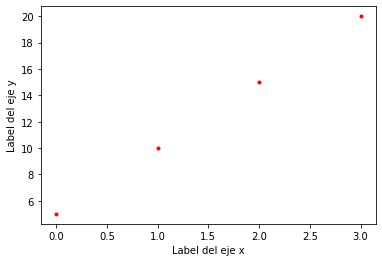

In [3]:
plt.figure() # <-- dónde y cúando es necesario esto?

plt.plot([5, 10, 15, 20], '.r')

plt.xlabel('Label del eje x')
plt.ylabel('Label del eje y')

plt.show() # <-- dónde y cúando es necesario esto?

Si proporciona una única lista o array a plot(), matplotlib supone que es una secuencia de valores "y", y genera automáticamente los valores x para usted. Como los intervalos de python comienzan con 0, el vector "x" predeterminado es [0,1,2,3].

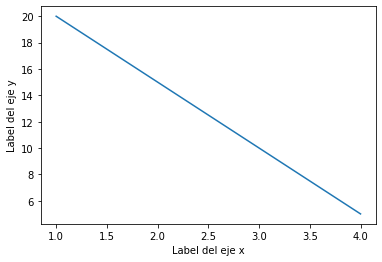

In [4]:
plt.plot([4, 3, 2, 1], [5, 10, 15, 20])
plt.xlabel('Label del eje x')
plt.ylabel('Label del eje y')
plt.show() 

Un ejemplo con más ingredientes:

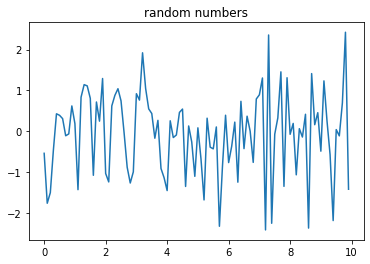

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'list'>
<class 'matplotlib.text.Text'>


In [5]:
t = np.arange(0, 10, 0.1)
y = np.random.randn(t.size)


fig = plt.figure()                    # con una funcion de pyplot creamos un objeto tipo Figure.

ax = fig.add_subplot(1, 1, 1)         # en la posicion 1-1 creamos un Subplot en nuestro objeto fig (que tendrá solo un plot)

lines = ax.plot(t, y)                 # en ese objeto plot graficamos x vs y

t = ax.set_title('random numbers')    # y al mismo plot le ponemos un titulo

plt.show()                            # por ultimo mostramos el grafico


print(type(fig))
print(type(ax))
print(type(lines))
print(type(t))

#### Estilos de formato

Hay un tercer argumento opcional que es un string de formato que indica el color y el tipo de línea del gráfico. Las letras y símbolos de este string, son indénticas a las de MATLAB. La cadena de formato predeterminada es 'b-', que es una línea azul continua. Por ejemplo, para trazar lo anterior con círculos rojos, hacemos:

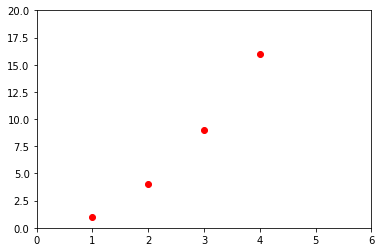

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

El comando plt.axis() en el ejemplo anterior toma una lista de [xmin, xmax, ymin, ymax] y especifica el rango de los ejes.

Si matplotlib se limitara a trabajar con listas, sería bastante inútil para el procesamiento numérico. En general, se usan array de Numpy. De hecho, todas las secuencias se convierten a array de Numpy internamente. El siguiente ejemplo ilustra el trazado de varios gráficos con diferentes estilos de formato, utilizando arrays:

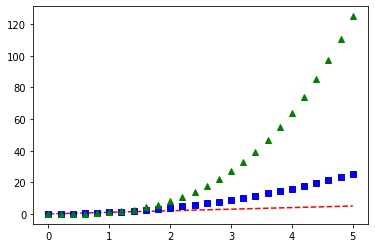

In [7]:
t = np.arange(0., 5.2, 0.2)   # tiempo de 0 a 5 seg, cada 200ms

plt.plot(t, t, 'r--')     # trazos rojos
plt.plot(t, t**2, 'bs') # cuadrados azules
plt.plot(t, t**3, 'g^')   # trángulos verdes

plt.show()

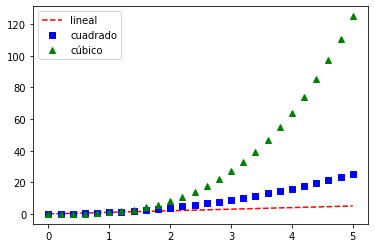

In [8]:
t = np.arange(0., 5.2, 0.2)   # tiempo de 0 a 5 seg, cada 200ms

plt.plot(t, t, 'r--', label = 'lineal')     # trazos rojos
plt.plot(t, t**2, 'bs', label = 'cuadrado') # cuadrados azules
plt.plot(t, t**3, 'g^', label = 'cúbico')   # trángulos verdes

plt.legend(loc="upper left")  

plt.show()

#### Control de propiedades de las línea

Las líneas tienen muchos atributos que puede establecer: ancho de línea, estilo del trazo, marcador, etc.

Hay varias formas de establecer propiedades de línea

* como usar argumentos con palabras clave:

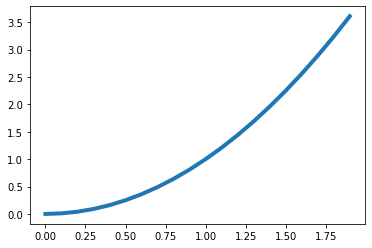

In [9]:
x = np.arange(0,2,0.1)
y = x**2

plt.plot(x, y, linewidth = 4.0)
plt.show()

* Usando los métodos set de una instancia de Line2D. La función plt.plot() devuelve una lista de objetos Line2D; por ejemplo, line1, line2 = plot(x1, y1, x2, y2)

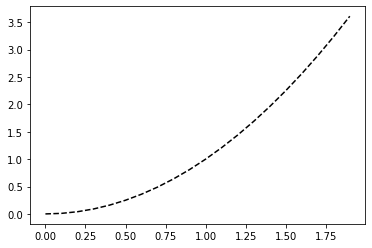

In [10]:
line, = plt.plot (x, y)

line.set_linestyle('--')
line.set_color('k')
plt.show()

* Use el comando plt.setp(). El siguiente ejemplo utiliza un comando estilo MATLAB para establecer múltiples propiedades en una lista de líneas. setp funciona de forma transparente con una lista de objetos o un solo objeto. Puede usar argumentos con palabras claves o pares de propiedad/valor:

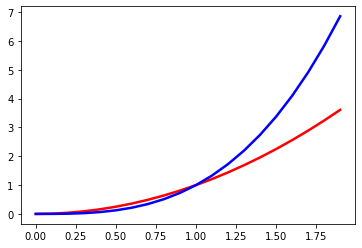

In [11]:
x1 = x2 = np.arange(0,2,0.1)
y1 = x1**2
y2 = x2**3

line1, line2 = plt.plot(x1, y1, x2, y2)

plt.setp(line1, color = 'r', linewidth = 2.5) # usando palabras clave
plt.setp(line2, 'color', 'b', 'linewidth', 2.5) # usando pares propiedad/valor

plt.show()

Aquí podrá encontrar la lista de todas las propiedades que se pueden setear en las líneas:

https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

También podrá obtener una lista de las propiedades configurables, llamando a la función setp() con una línea o líneas como argumento:

In [12]:
plt.setp(line1)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  m

#### Trabajando con múltiples figuras y ejes
Pyplot (y Matlab) tienen el concepto de *current figure* y *current axes*. Todos los comandos de graficación se aplican al *current axes*. La función gca() devuelve los *current axes* activos y gcf() devuelve la *current figure*.

Normalmente, uno no tiene que preocuparse por esto, porque todo esto se maneja detrás de escena. 

A continuación se muestra una secuencia de comandos para crear dos *subplots*:

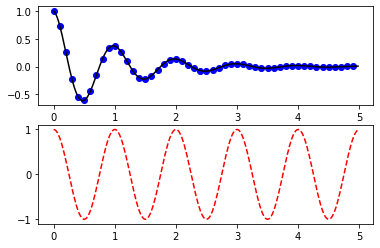

In [13]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

El comando figure() aquí es superfluo porque la figura se creará de forma predeterminada. 
El comando subplot() especifica *numrows*, *numcols*, *fignum* donde *fignum* va de 1 a *numrows x numcols*. Las comas en el comando subplot son opcionales (si *numrows x numcols <10*). 

Puede crear varias figuras utilizando múltiples llamados a figure(). Por supuesto, cada figura puede contener tantos ejes y *subplots* como desee:

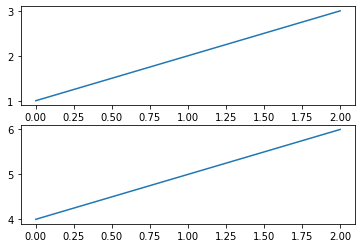

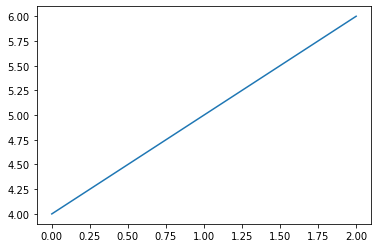

In [16]:

plt.figure(1)                # la primer figura
plt.subplot(211)             # el primer subplot en la primer figura
plt.plot([1, 2, 3])
plt.subplot(212)             # el segundo subplot en la primer figura
plt.plot([4, 5, 6])
plt.show()


plt.figure(2)                # la segunda figura
plt.plot([4, 5, 6])          # (se crea un subplot(111) por default)
plt.show()

#### Trabajando con texto

El comando text() se puede usar para agregar texto en una ubicación arbitraria, y xlabel(), ylabel() y title() se utilizan para agregar texto en como label de los ejes y como título (consulte la documentación de text() para obtener ejemplos más detallados)


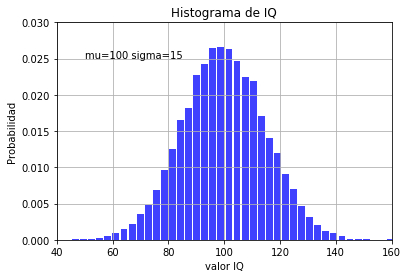

In [17]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# hacemos un histograma
# plt.figure(figsize=(10,5))

plt.hist(x, 40, density=1, facecolor='b', alpha=0.75, rwidth = 0.85)

plt.xlabel('valor IQ')
plt.ylabel('Probabilidad')
plt.title('Histograma de IQ')
plt.text(50, .025, 'mu=100 sigma=15')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Al igual que con las propiedades de las líneas, se puede personalizar las propiedades pasando argumentos con palabras clave.

Matplotlib acepta expresiones de LaTeX en cualquier expresión de texto. Por ejemplo, se puede escribir una expresión LaTeX en el título, rodeandola de signos pesos ($):

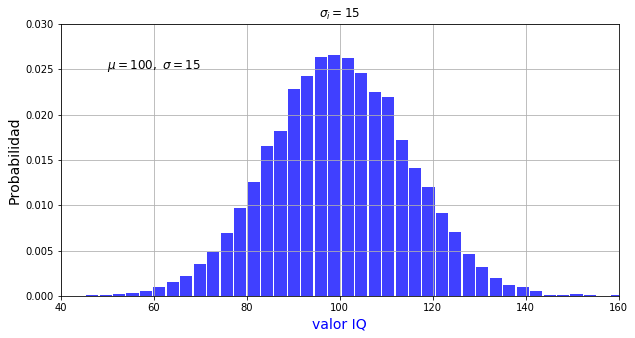

In [18]:
fig = plt.figure(figsize = (10,5))

plt.hist(x, 40, density=1, facecolor='b', alpha=0.75, rwidth = 0.9)

plt.xlabel('valor IQ', fontsize=14, color='b')
plt.ylabel('Probabilidad', fontsize=14)
plt.title(r'$\sigma_i=15$')
plt.text(50, .025, r'$\mu=100,\ \sigma=15$', fontsize=12)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.draw()

Quedó linda... la guardamos

In [19]:
fig.savefig('histograma.png')

#### Ejes logarítmicos 

Matplotlib.pyplot admite no solo escalas de ejes lineales, sino también escalas logarítmicas (y algunas otroas más). Cambiar la escala de un eje es fácil. A continuación, se muestra un ejemplo de dos gráficos con los mismos datos y diferentes escalas para el eje y:

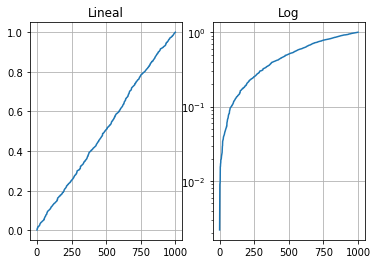

In [20]:
# make up some data in the interval (0, 1)

y = np.random.random(size=1000)

y.sort()
x = np.arange(len(y))


# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(121)
plt.plot(x, y)
# plt.yscale('linear')
plt.title('Lineal')
plt.grid(True)


# log
plt.subplot(122)
plt.plot(x, y)    # plt.semilogy()
plt.yscale('log')
plt.title('Log')
plt.grid(True)

plt.show()

#### Grafico de puntos (scatter)


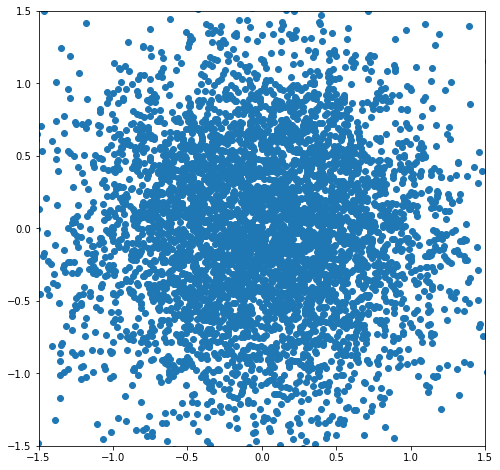

In [21]:
n = 5000

X = np.random.normal(0, 0.6, n)
Y = np.random.normal(0, 0.6, n)

plt.figure(figsize=(8,8))
plt.scatter(X, Y)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.show()

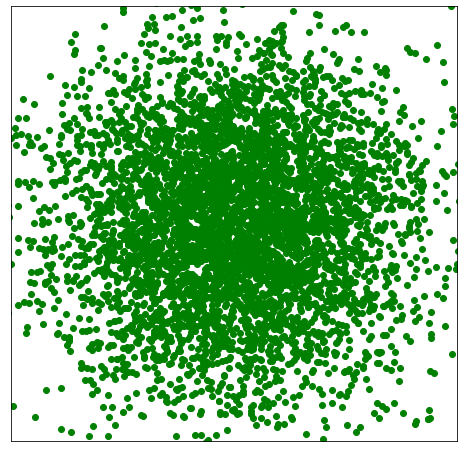

In [23]:
n = 5000

X = np.random.normal(0, 0.6, n)
Y = np.random.normal(0, 0.6, n)
T = np.arctan2(Y, X)

plt.figure(figsize=(8,8))
plt.scatter(X, Y, c = 'g') #c= T, cmap = 'jet', edgecolors='k'

plt.xlim(-1.5, 1.5)
plt.xticks(())
plt.ylim(-1.5, 1.5)
plt.yticks(())

plt.show()

#### Histogramas

Vamos a ver cómo generar histogramas usando *Numpy* y *Matplotlib*

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib qt5
%matplotlib inline

In [27]:
n = 5000

A = np.random.normal(0, 0.6, n)

In [28]:
h, b = np.histogram(A, bins=20)

h.size, b.size

(20, 21)

In [29]:
x = (b[1:] + b[:-1])/2

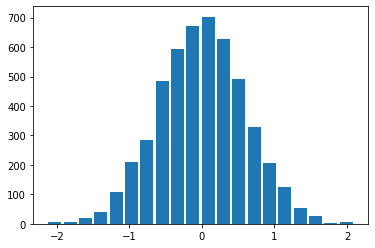

In [30]:
plt.bar(x, h, align="center", width=0.18)
plt.show()

Matplotlib tiene una función similar, que directamente realiza el gráfico

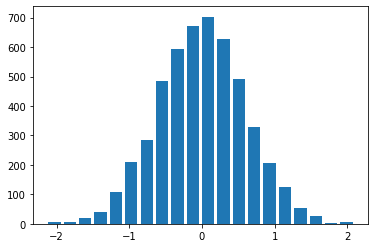

In [31]:
plt.hist(A, bins=20, rwidth=0.8)
plt.show()

Un ejemplo más rebuscado:

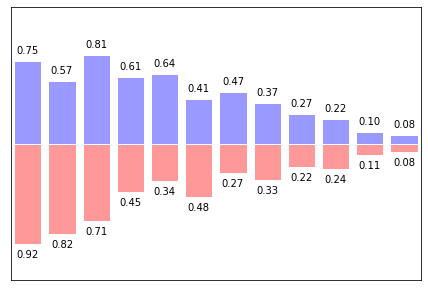

In [32]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

for x, y in zip(X, Y2):
    plt.text(x, -y-0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-0.5, n-0.5)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

#### Gráfico de contornos (contour)

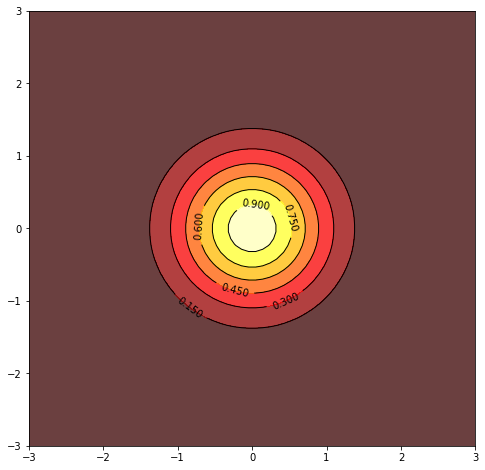

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return np.exp(-x**2 - y**2)

n = 64
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

X,Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8,8))

plt.contourf(X, Y, Z, 8, alpha=.75, cmap='hot')
C = plt.contour(X, Y, f(X, Y), 8, colors='k', linewidths=1) #
plt.clabel(C, inline=2, fontsize=10)

# plt.xticks(())
# plt.yticks(())
plt.show()

#### Gráfico de imágenes (imshow)

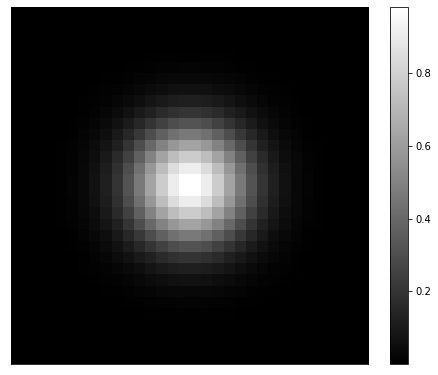

In [34]:
def f(x,y):
    return np.exp(-x**2 -y**2)

n = 32
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8,8))

plt.imshow(Z, cmap='gray', interpolation = None) #, interpolation = 'bilinear'
plt.colorbar(shrink=.82)

plt.xticks(())
plt.yticks(())
plt.show()

## 1.2 Ahora en 3D

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

# %matplotlib qt5

#### Wireframe

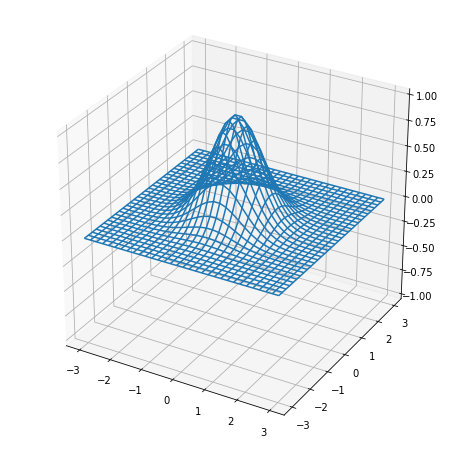

In [36]:


fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)

plt.show()

#### Superficie

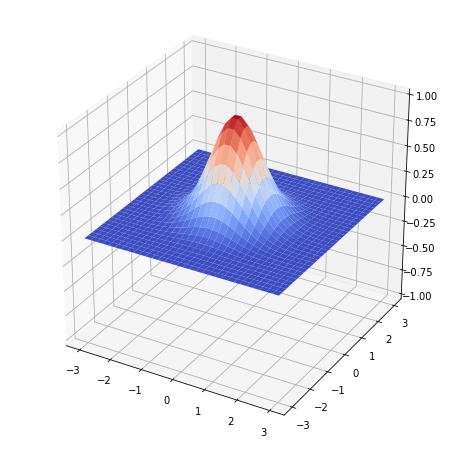

In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap= 'coolwarm', linewidths=0)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)


plt.show()

#### Contornos (pero en 3D)

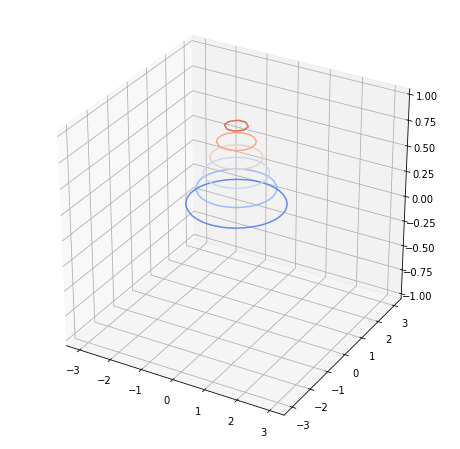

In [38]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


cset = ax.contour(X, Y, Z, cmap='coolwarm')

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)

plt.show()

#### Contornos (que protruyen)

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

cset = ax.contour(X, Y, Z, extend3d=True, cmap= 'coolwarm')

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)

plt.show()

#### Contornos proyectados

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')


ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-1.01, cmap='coolwarm')
cset = ax.contour(X, Y, Z, 20, zdir='x', offset=-3.0, cmap='coolwarm')
cset = ax.contour(X, Y, Z, 20, zdir='y', offset=3.0, cmap='coolwarm')

ax.set_xlabel('X')
ax.set_xlim(-3.0, 3.0)
ax.set_ylabel('Y')
ax.set_ylim(-3.0, 3.0)
ax.set_zlabel('Z')
ax.set_zlim(-1.01, 1.01)

plt.show()

#### plot 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)

z = np.linspace(-2, 2, 100)

r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

#### Scatter 3D

In [ ]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

A pesar de lo visto, los gráficos 3D en matplotlib tienen algunas limitaciones (no se pueden fijar la relación de aspecto de los ejes, por ejemplo). 

Una herramienta poderosa para la visualización 3D, es vtk (que, afortunadamente, posee wrappers para python).